<a href="https://colab.research.google.com/github/yanj227/data_analysis/blob/main/R%E8%AA%9E%E8%A8%80_%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97_%E8%88%AA%E7%A9%BA(AirPassengers)%E5%88%86%E6%9E%90%E5%AF%A6%E4%BD%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R語言-時間序列 Time Series Analysis and Mining 
產生Colab R 程式環境: https://colab.research.google.com/notebook#create=true&language=r

# 時間序列分解 Time Series Decomposition 

In [ ]:
### 時間序列分解 Time Series Decomposition ----
# 時間序列分解是將時間序列分解為趨勢分量，季節分量，週期分量和不規則分量。 
# 趨勢分量代表長期趨勢，季節分量為季節性變化，週期性分量反复但非週期性波動，殘差為不規則分量。
# Time Series Decomposition is to decompose a time series into trend, seasonal, cyclical and irregular components. 
# The trend component stands for long term trend, the seasonal component is seasonal variation, 
# the cyclical component is repeated but non-periodic fluctuations, and the residuals are irregular component.

# 下面以AirPassengers的時間序列為例來演示時間序列分解。

導入航空資料集

In [ ]:
# 下面以AirPassengers的時間序列為例來演示時間序列分解。 
# 它由1949年至1960年的Box＆Jenkins國際航空公司乘客的月總數組成，它有144（= 12 * 12）個值。
# A time series of AirPassengers is used below as an example to demonstrate time series de- composition. It is composed of monthly totals of Box & Jenkins international airline passengers from 1949 to 1960. It has 144(=12*12) values.

data(AirPassengers)
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [ ]:
str(AirPassengers)
#  Time-Series [1:144] from 1949 to 1961: 112 118 132 129 121 135 148 148 136 119

 Time-Series [1:144] from 1949 to 1961: 112 118 132 129 121 135 148 148 136 119 ...


In [ ]:
summary(AirPassengers)
#  Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
# 104.0   180.0   265.5   280.3   360.5   622.0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

In [ ]:
AirPassengers
#      Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
# 1949 112 118 132 129 121 135 148 148 136 119 104 118
# 1950 115 126 141 135 125 149 170 170 158 133 114 140
# 1951 145 150 178 163 172 178 199 199 184 162 146 166
# 1952 171 180 193 181 183 218 230 242 209 191 172 194
# 1953 196 196 236 235 229 243 264 272 237 211 180 201
# 1954 204 188 235 227 234 264 302 293 259 229 203 229
# 1955 242 233 267 269 270 315 364 347 312 274 237 278
# 1956 284 277 317 313 318 374 413 405 355 306 271 306
# 1957 315 301 356 348 355 422 465 467 404 347 305 336
# 1958 340 318 362 348 363 435 491 505 404 359 310 337
# 1959 360 342 406 396 420 472 548 559 463 407 362 405
# 1960 417 391 419 461 472 535 622 606 508 461 390 432

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [ ]:
?AirPassengers  
# 1949-1960 每月航空公司的乘客人數 Monthly Airline Passenger Numbers 1949-1960

# The classic Box & Jenkins airline data. 
# Monthly totals of international airline passengers, 1949 to 1960.
# A monthly time series, in thousands. 每月時間系列，以千計。

$tsp
[1] 1949.000 1960.917   12.000

$class
[1] "ts"

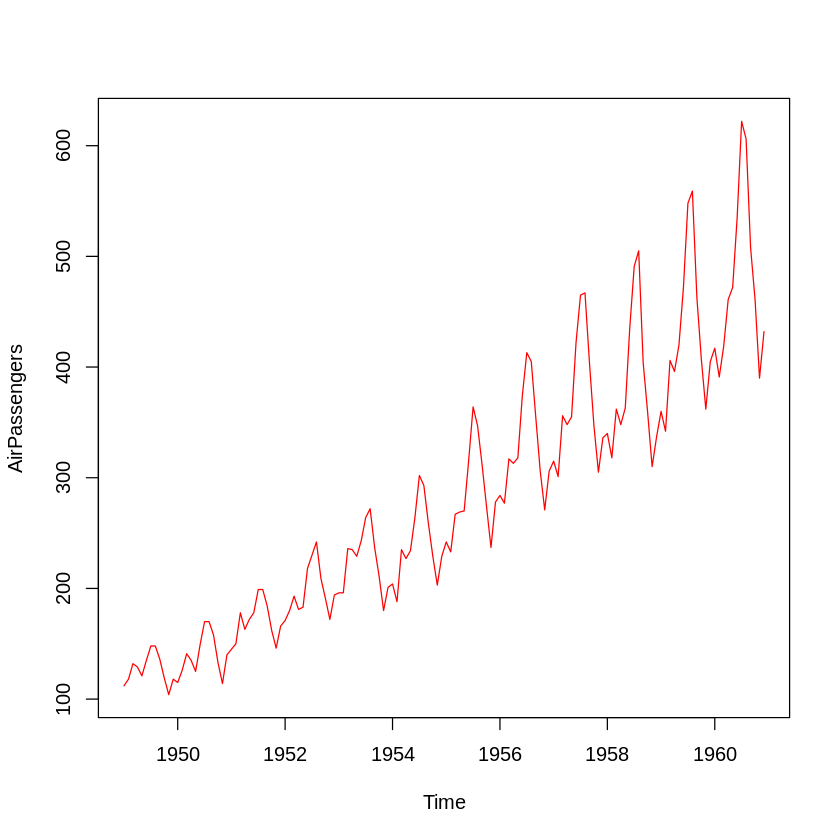

In [ ]:
attributes(AirPassengers)
# $tsp
# [1] 1949.000 1960.917   12.000
# 
# $class
# [1] "ts"

plot(AirPassengers, col = "red")

In [ ]:
library(ggplot2)

In [ ]:
library(nlme)
head(Oxboys)
data(Oxboys)
dim(Oxboys)  # [1] 234   4
names(Oxboys)
# [1] "Subject"  "age"      "height"   "Occasion"

?Oxboys
# Heights of Boys in Oxford 牛津男孩的高度

,Subject,age,height,Occasion
,<ord>,<dbl>,<dbl>,<ord>
1,1,-1.0000,140.5,1
2,1,-0.7479,143.4,2
3,1,-0.4630,144.8,3
4,1,-0.1643,147.1,4
5,1,-0.0027,147.7,5
6,1,0.2466,150.2,6


[1] 234   4

[1] "Subject"  "age"      "height"   "Occasion"

In [ ]:
Oxboys

,Subject,age,height,Occasion
,<ord>,<dbl>,<dbl>,<ord>
1,1,-1.0000,140.5,1
2,1,-0.7479,143.4,2
3,1,-0.4630,144.8,3
4,1,-0.1643,147.1,4
5,1,-0.0027,147.7,5
6,1,0.2466,150.2,6
7,1,0.5562,151.7,7
8,1,0.7781,153.3,8
9,1,0.9945,155.8,9


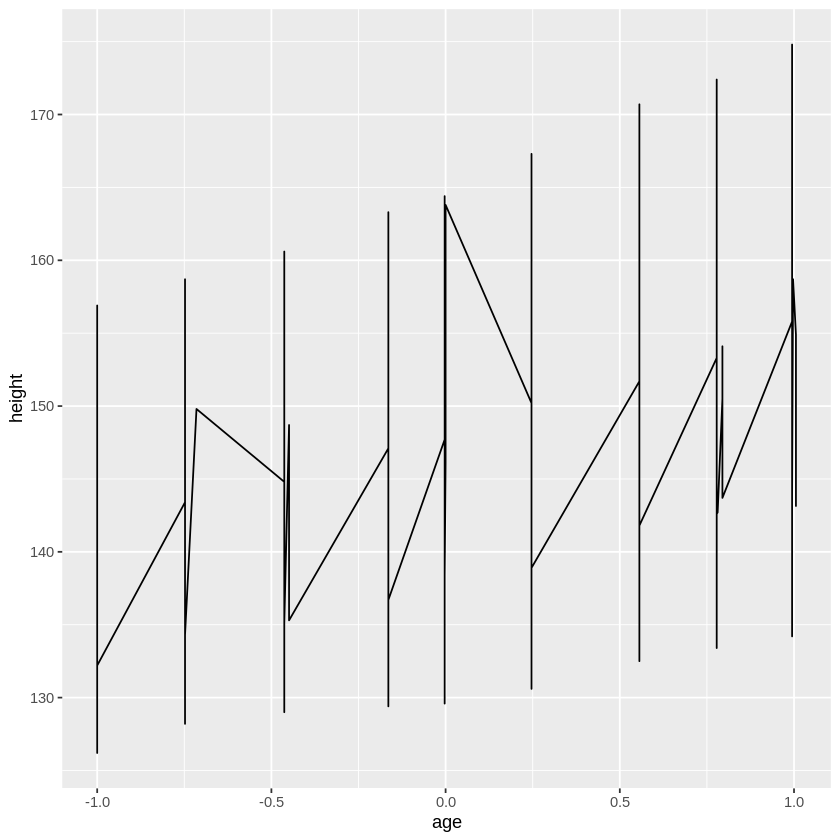

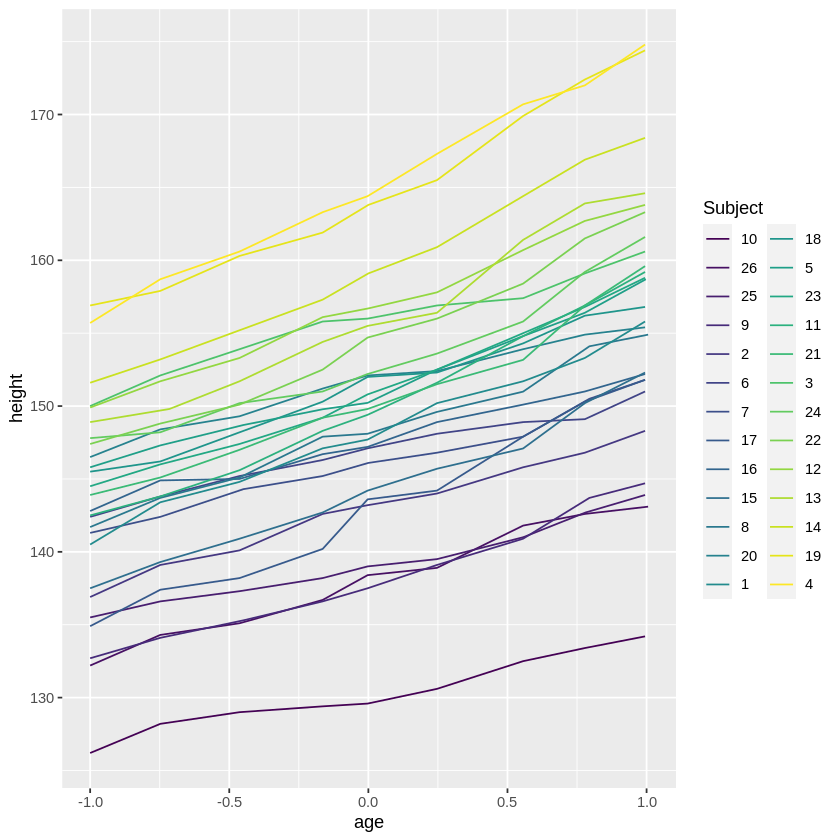

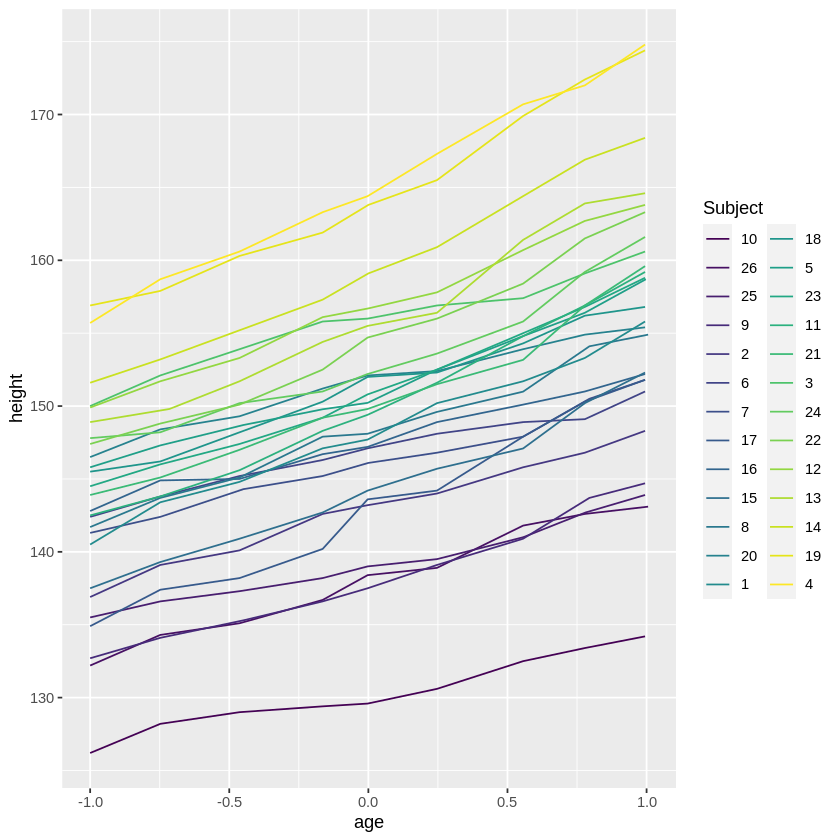

In [ ]:
# 這裡我們以 nlme 套件中的 Oxboys 資料集來做示範，在這個資料集中包含了許多個體的時間序列資料，
# 如果只是單純將時間序列畫出來，圖形會有問題：
ggplot(Oxboys, aes(age, height)) + geom_line()

# 上面的圖形是將所有個體的資料都混合在一起繪製，但我們通常會希望依據個體區分，畫出多條時間序列的線條，這時候就可以加上 group 參數，並將其指定為個體的變數：
ggplot(Oxboys, aes(age, height, group = Subject, col = Subject)) + geom_line()
# 或是
ggplot(Oxboys, aes(age, height, col = Subject)) + geom_line()

### end of 時間序列數據使用ggplot2展示 舊的方法!!! 

# 運用方法1 
函數 decompose（）應用於AirPassengers，將其分解為各種組件。

In [ ]:
# Function decompose() is applied below to AirPassengers to break it into various components.
# decompose time series
apts <- ts(AirPassengers, frequency=12)
apts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,112,118,132,129,121,135,148,148,136,119,104,118
2,115,126,141,135,125,149,170,170,158,133,114,140
3,145,150,178,163,172,178,199,199,184,162,146,166
4,171,180,193,181,183,218,230,242,209,191,172,194
5,196,196,236,235,229,243,264,272,237,211,180,201
6,204,188,235,227,234,264,302,293,259,229,203,229
7,242,233,267,269,270,315,364,347,312,274,237,278
8,284,277,317,313,318,374,413,405,355,306,271,306
9,315,301,356,348,355,422,465,467,404,347,305,336
10,340,318,362,348,363,435,491,505,404,359,310,337


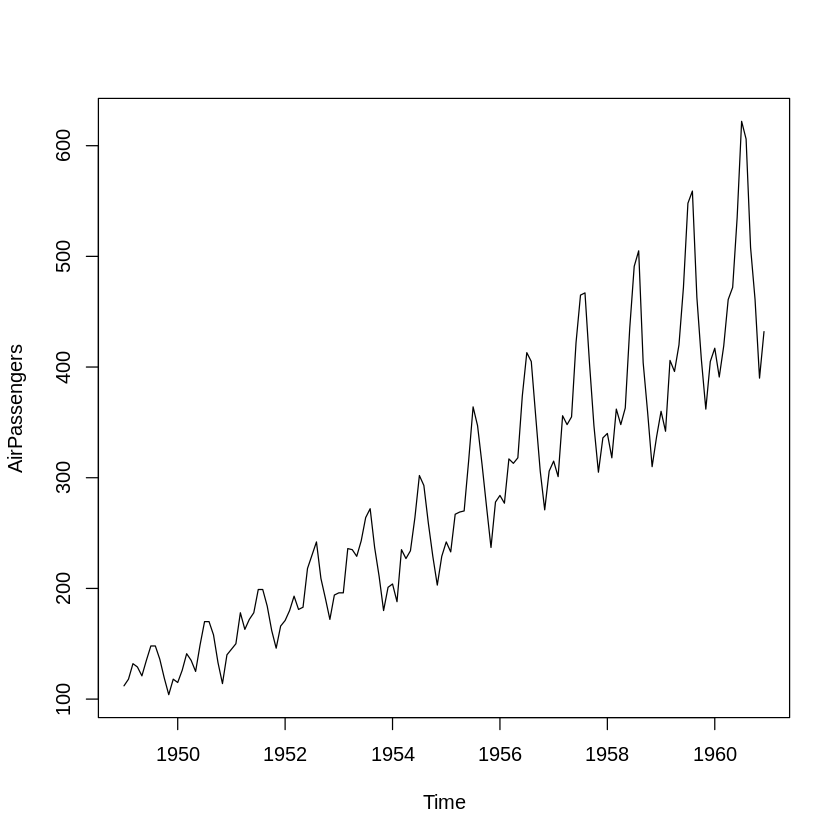

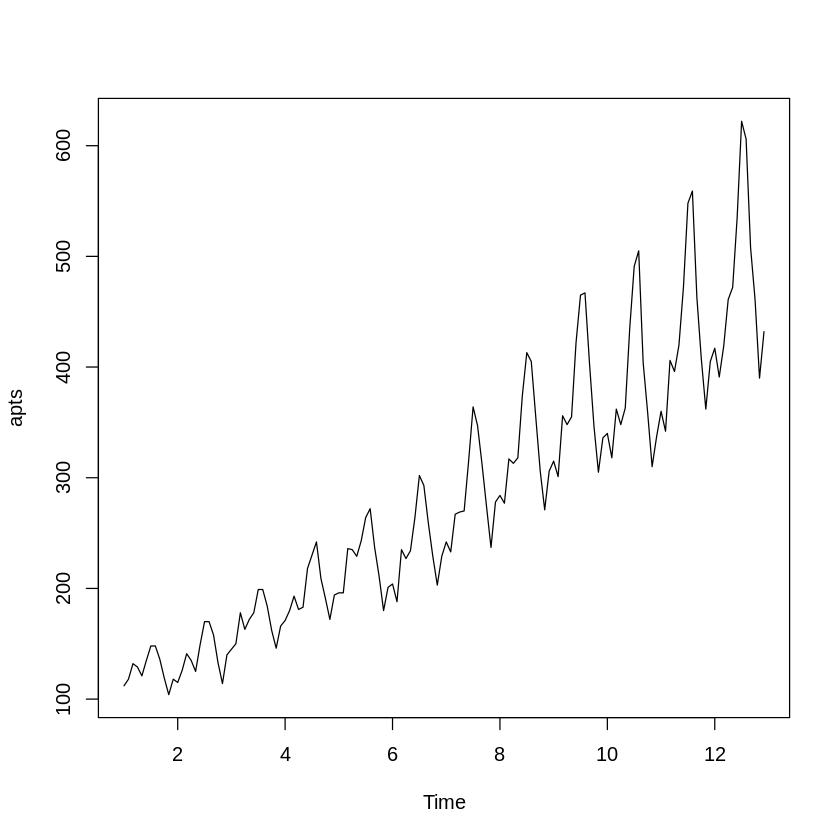

In [ ]:
plot(AirPassengers)
plot(apts)

In [ ]:
?decompose
# 移動平均的經典季節分解
# Classical Seasonal Decomposition by Moving Averages 
# 使用移動平均值將時間序列分解為季節性，趨勢和不規則分量。 處理加法或乘法季節性組件。
# Decompose a time series into seasonal, trend and irregular components using moving averages. Deals with additive or multiplicative seasonal component.
# x	        The original series. 原始系列
# seasonal	The seasonal component (i.e., the repeated seasonal figure).
#           季節性季節性分量（即重複的季節性數字）
# figure	  The estimated seasonal figure only. 只是估計的季節性數字
# trend	    The trend component. 趨勢趨勢組件
# random	  The remainder part. 隨機剩餘部分
# type	    The value of type. 類型的值

In [ ]:
f <- decompose(apts)
class(f)
# [1] "decomposed.ts"#季節分解-時間序列

[1] "decomposed.ts"

In [ ]:
f
# $x  原始系列
#    Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
# 1  112 118 132 129 121 135 148 148 136 119 104 118
# 2  115 126 141 135 125 149 170 170 158 133 114 140
# 3  145 150 178 163 172 178 199 199 184 162 146 166
# 4  171 180 193 181 183 218 230 242 209 191 172 194
# 5  196 196 236 235 229 243 264 272 237 211 180 201
# 6  204 188 235 227 234 264 302 293 259 229 203 229
# 7  242 233 267 269 270 315 364 347 312 274 237 278
# 8  284 277 317 313 318 374 413 405 355 306 271 306
# 9  315 301 356 348 355 422 465 467 404 347 305 336
# 10 340 318 362 348 363 435 491 505 404 359 310 337
# 11 360 342 406 396 420 472 548 559 463 407 362 405
# 12 417 391 419 461 472 535 622 606 508 461 390 432
# 
# $seasonal  季節性季節性分量（即重複的季節性數字）
# Jan        Feb        Mar        Apr        May        Jun        Jul        Aug
# 1  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 2  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 3  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 4  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 5  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 6  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 7  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 8  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 9  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 10 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 11 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# 12 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# Sep        Oct        Nov        Dec
# 1   16.520202 -20.642677 -53.593434 -28.619949
# 2   16.520202 -20.642677 -53.593434 -28.619949
# 3   16.520202 -20.642677 -53.593434 -28.619949
# 4   16.520202 -20.642677 -53.593434 -28.619949
# 5   16.520202 -20.642677 -53.593434 -28.619949
# 6   16.520202 -20.642677 -53.593434 -28.619949
# 7   16.520202 -20.642677 -53.593434 -28.619949
# 8   16.520202 -20.642677 -53.593434 -28.619949
# 9   16.520202 -20.642677 -53.593434 -28.619949
# 10  16.520202 -20.642677 -53.593434 -28.619949
# 11  16.520202 -20.642677 -53.593434 -28.619949
# 12  16.520202 -20.642677 -53.593434 -28.619949
# 
# $trend 趨勢趨勢組件
#         Jan      Feb      Mar      Apr      May      Jun      Jul      Aug      Sep      Oct
# 1        NA       NA       NA       NA       NA       NA 126.7917 127.2500 127.9583 128.5833
# 2  131.2500 133.0833 134.9167 136.4167 137.4167 138.7500 140.9167 143.1667 145.7083 148.4167
# 3  157.1250 159.5417 161.8333 164.1250 166.6667 169.0833 171.2500 173.5833 175.4583 176.8333
# 4  183.1250 186.2083 189.0417 191.2917 193.5833 195.8333 198.0417 199.7500 202.2083 206.2500
# 5  215.8333 218.5000 220.9167 222.9167 224.0833 224.7083 225.3333 225.3333 224.9583 224.5833
# 6  228.0000 230.4583 232.2500 233.9167 235.6250 237.7500 240.5000 243.9583 247.1667 250.2500
# 7  261.8333 266.6667 271.1250 275.2083 278.5000 281.9583 285.7500 289.3333 293.2500 297.1667
# 8  309.9583 314.4167 318.6250 321.7500 324.5000 327.0833 329.5417 331.8333 334.4583 337.5417
# 9  348.2500 353.0000 357.6250 361.3750 364.5000 367.1667 369.4583 371.2083 372.1667 372.4167
# 10 375.2500 377.9167 379.5000 380.0000 380.7083 380.9583 381.8333 383.6667 386.5000 390.3333
# 11 402.5417 407.1667 411.8750 416.3333 420.5000 425.5000 430.7083 435.1250 437.7083 440.9583
# 12 456.3333 461.3750 465.2083 469.3333 472.7500 475.0417       NA       NA       NA       NA
#         Nov      Dec
# 1  129.0000 129.7500
# 2  151.5417 154.7083
# 3  178.0417 180.1667
# 4  210.4167 213.3750
# 5  224.4583 225.5417
# 6  253.5000 257.1250
# 7  301.0000 305.4583
# 8  340.5417 344.0833
# 9  372.7500 373.6250
# 10 394.7083 398.6250
# 11 445.8333 450.6250
# 12       NA       NA
# 
# $random  隨機剩餘部分
# Jan         Feb         Mar         Apr         May         Jun         Jul
# 1           NA          NA          NA          NA          NA          NA -42.6224747
# 2    8.4987374  29.1047980   8.3244949   6.6199495  -7.9103535 -25.1527778 -34.7474747
# 3   12.6237374  26.6464646  18.4078283   6.9116162   9.8396465 -26.4861111 -36.0808081
# 4   12.6237374  29.9797980   6.1994949  -2.2550505  -6.0770202 -13.2361111 -31.8724747
# 5    4.9154040  13.6881313  17.3244949  20.1199495   9.4229798 -17.1111111 -25.1641414
# 6    0.7487374  -6.2702020   4.9911616   1.1199495   2.8813131  -9.1527778  -2.3308081
# 7    4.9154040   2.5214646  -1.8838384   1.8282828  -3.9936869  -2.3611111  14.4191919
# 8   -1.2095960  -1.2285354   0.6161616  -0.7133838  -1.9936869  11.5138889  19.6275253
# 9   -8.5012626 -15.8118687   0.6161616  -5.3383838  -4.9936869  19.4305556  31.7108586
# 10 -10.5012626 -23.7285354 -15.2588384 -23.9633838 -13.2020202  18.6388889  45.3358586
# 11 -17.7929293 -28.9785354  -3.6338384 -12.2967172   4.0063131  11.0972222  53.4608586
# 12 -14.5845960 -34.1868687 -43.9671717  -0.2967172   3.7563131  24.5555556          NA
# Aug         Sep         Oct         Nov         Dec
# 1  -42.0732323  -8.4785354  11.0593434  28.5934343  16.8699495
# 2  -35.9898990  -4.2285354   5.2260101  16.0517677  13.9116162
# 3  -37.4065657  -7.9785354   5.8093434  21.5517677  14.4532828
# 4  -20.5732323  -9.7285354   5.3926768  15.1767677   9.2449495
# 5  -16.1565657  -4.4785354   7.0593434   9.1351010   4.0782828
# 6  -13.7815657  -4.6868687  -0.6073232   3.0934343   0.4949495
# 7   -5.1565657   2.2297980  -2.5239899 -10.4065657   1.1616162
# 8   10.3434343   4.0214646 -10.8989899 -15.9482323  -9.4633838
# 9   32.9684343  15.3131313  -4.7739899 -14.1565657  -9.0050505
# 10  58.5101010   0.9797980 -10.6906566 -31.1148990 -33.0050505
# 11  61.0517677   8.7714646 -13.3156566 -30.2398990 -17.0050505
# 12          NA          NA          NA          NA          NA
# 
# $figure  估計的季節性數字
# [1] -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808  62.823232
# [9]  16.520202 -20.642677 -53.593434 -28.619949
# 
# $type
# [1] "additive"
# 
# attr(,"class")
# [1] "decomposed.ts"

## end of f


$x
   Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1  112 118 132 129 121 135 148 148 136 119 104 118
2  115 126 141 135 125 149 170 170 158 133 114 140
3  145 150 178 163 172 178 199 199 184 162 146 166
4  171 180 193 181 183 218 230 242 209 191 172 194
5  196 196 236 235 229 243 264 272 237 211 180 201
6  204 188 235 227 234 264 302 293 259 229 203 229
7  242 233 267 269 270 315 364 347 312 274 237 278
8  284 277 317 313 318 374 413 405 355 306 271 306
9  315 301 356 348 355 422 465 467 404 347 305 336
10 340 318 362 348 363 435 491 505 404 359 310 337
11 360 342 406 396 420 472 548 559 463 407 362 405
12 417 391 419 461 472 535 622 606 508 461 390 432

$seasonal
          Jan        Feb        Mar        Apr        May        Jun        Jul
1  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808
2  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808
3  -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778  63.830808
4  

In [ ]:
names(f)        #decompose  6種功能
# [1] "x"    "seasonal" "trend"    "random"   "figure"   "type" 

[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"

In [ ]:
f$figure#季節性數字

[1] -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
 [7]  63.830808  62.823232  16.520202 -20.642677 -53.593434 -28.619949

[1] "January"   "February"  "March"     "April"     "May"       "June"     
 [7] "July"      "August"    "September" "October"   "November"  "December"

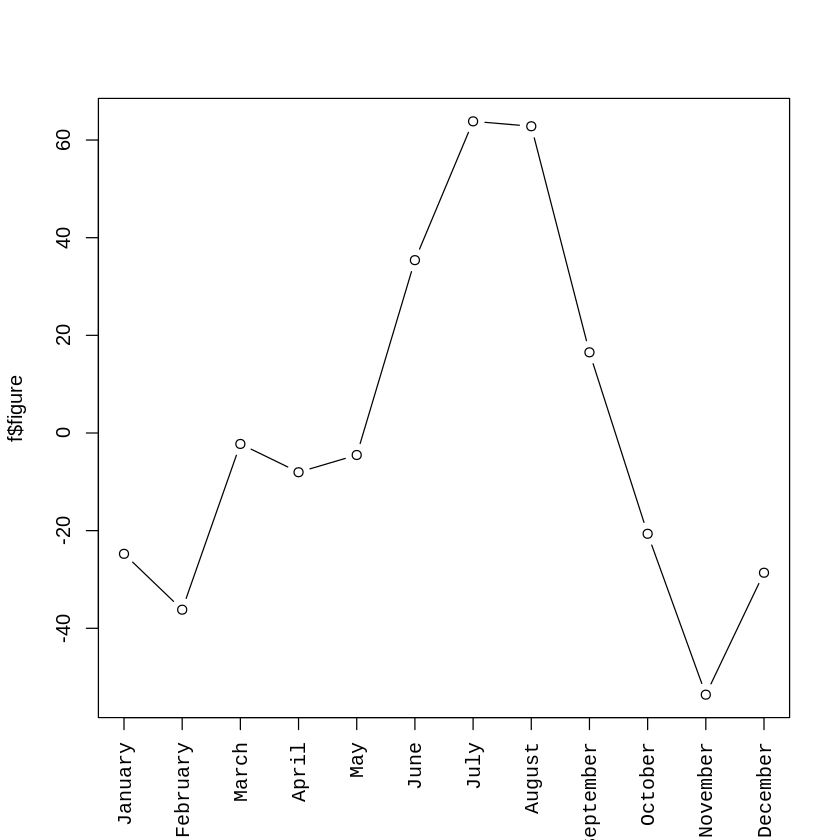

In [ ]:
plot(f$figure, type="b", xaxt="n", xlab="")

 #plot(f$figure, type="b", xlab="月份")
# 
# plot(f$figure, type="b", xlab="月份", ylab="月份數量")

# get names of 12 months in English words
monthNames <- months(ISOdate(2018,1:12,1))
monthNames
# [1] "一月"   "二月"   "三月"   "四月"   "五月"   "六月"   "七月"   "八月"   "九月"   "十月"   "十一月"
# [12] "十二月"
# label x-axis with month names
# las is set to 2 for vertical label orientation
axis(1, at=1:12, labels=monthNames, las=2, family="STKaiti")

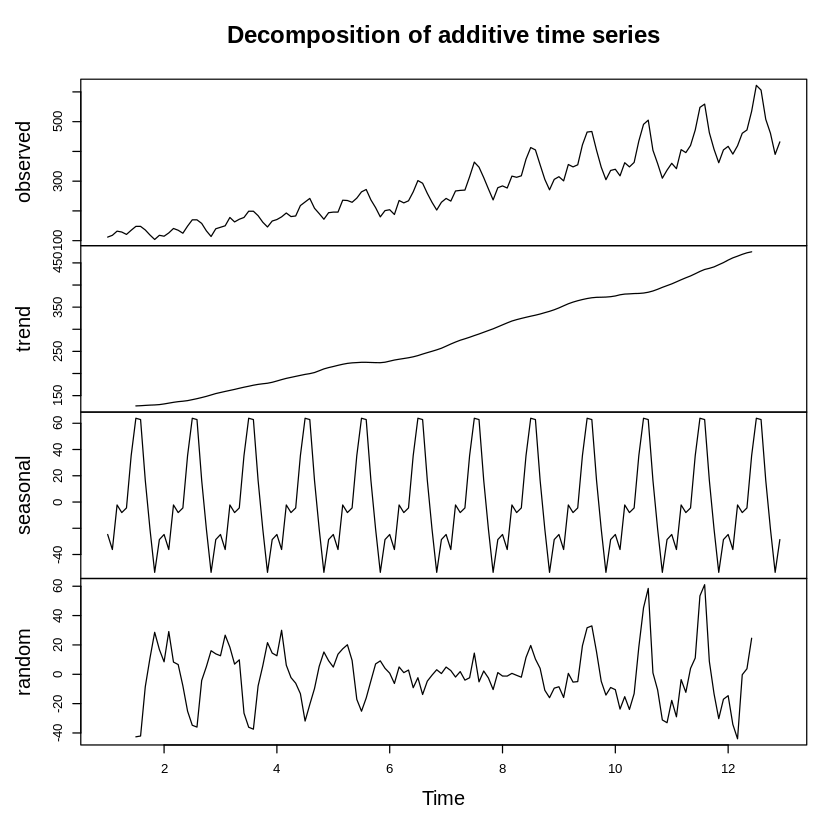

In [ ]:
# 使用移動平均值將時間序列分解為季節性，趨勢和不規則分量。 處理加法或乘法季節性組件。
# Decompose a time series into seasonal, trend and irregular components using moving averages. Deals with additive or multiplicative seasonal component.
# 區分 observed, trend , searonal, random 四張圖
plot(f)

# 在下圖中，第一張圖是原始時間序列。 
#             二張圖是數據趨勢，
#             三張圖是季節性因素，
#             最後一張圖是去除趨勢和季節性因素後的組成部分。

# 運用方法2
 時間序列分解 stl() 

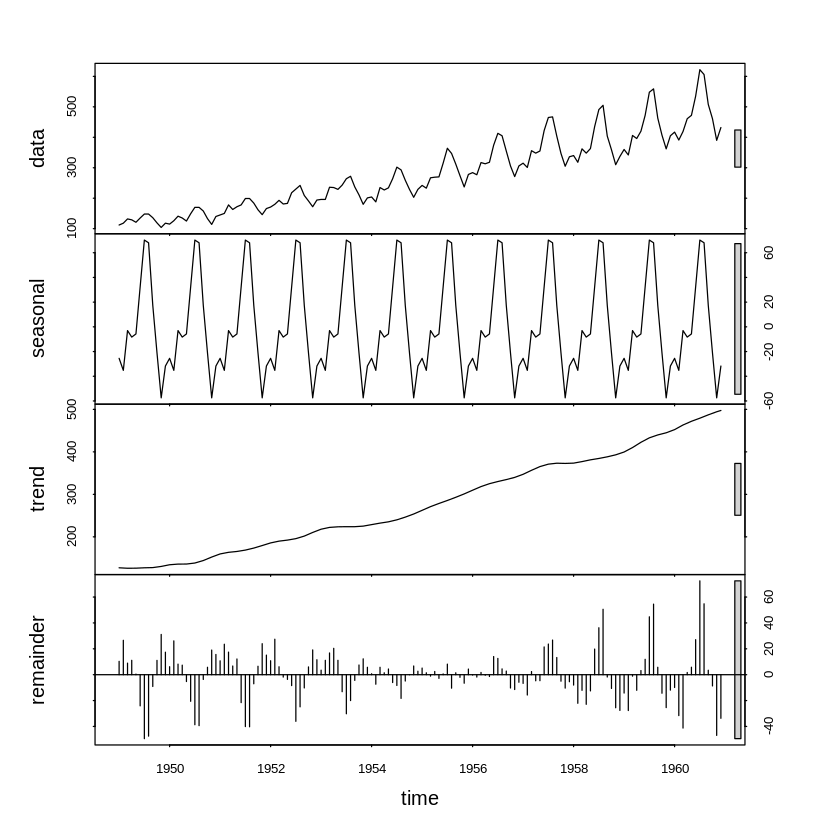

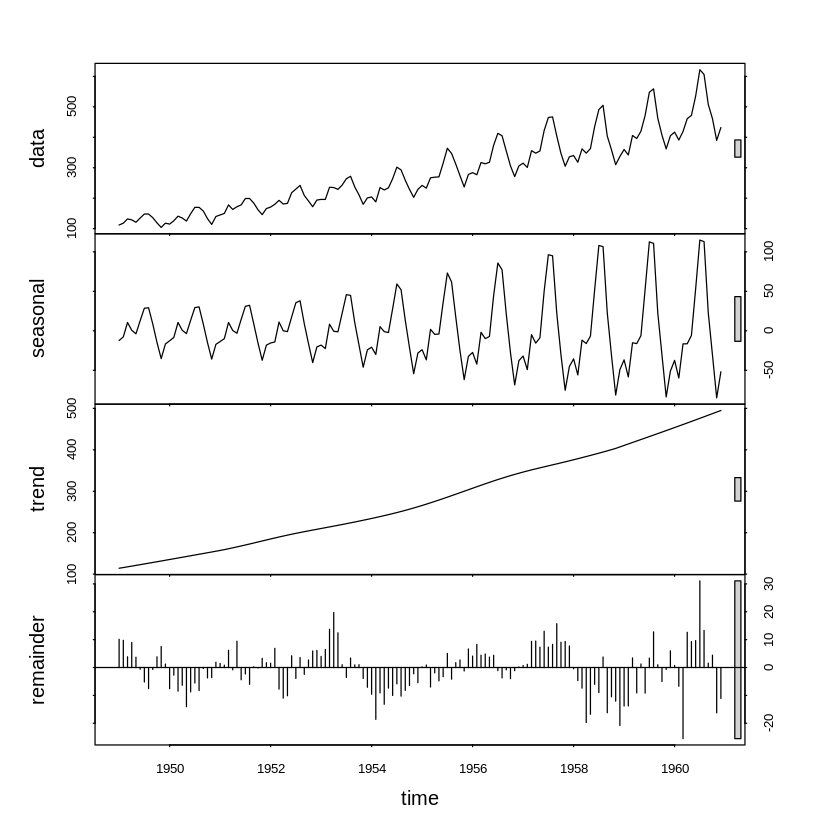

 Call:
 stl(x = log(AirPassengers), s.window = 21)

 Time.series components:
    seasonal               trend            remainder          
 Min.   :-0.21739640   Min.   :4.819222   Min.   :-0.09737649  
 1st Qu.:-0.09219334   1st Qu.:5.202290   1st Qu.:-0.01450567  
 Median :-0.01139974   Median :5.551301   Median :-0.00057818  
 Mean   : 0.00014603   Mean   :5.542327   Mean   :-0.00029663  
 3rd Qu.: 0.07395644   3rd Qu.:5.916543   3rd Qu.: 0.01797625  
 Max.   : 0.22783935   Max.   :6.203014   Max.   : 0.07865388  
 IQR:
     STL.seasonal STL.trend STL.remainder data   
     0.16615      0.71425   0.03248       0.69453
   %  23.9        102.8       4.7         100.0  

 Weights: all == 1

 Other components: List of 5
 $ win  : Named num [1:3] 21 21 13
 $ deg  : Named int [1:3] 0 1 1
 $ jump : Named num [1:3] 3 3 2
 $ inner: int 2
 $ outer: int 0


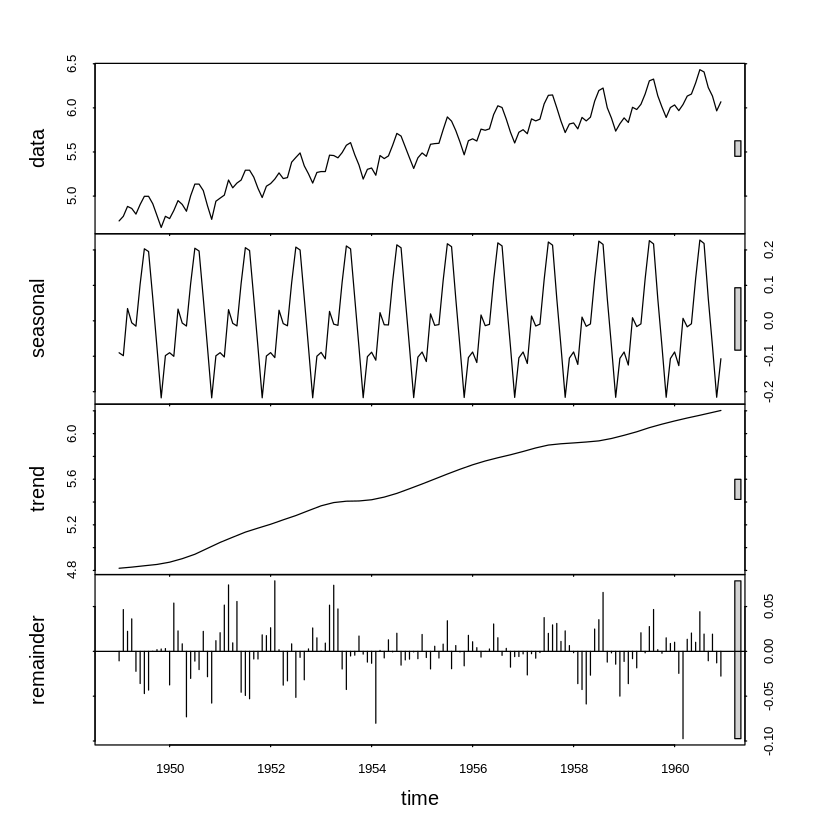

 Call:
 stl(x = AirPassengers, s.window = "per", robust = TRUE)

 Time.series components:
    seasonal             trend            remainder        
 Min.   :-48.68600   Min.   :123.1857   Min.   :-35.68728  
 1st Qu.:-18.03600   1st Qu.:182.5829   1st Qu.: -5.89381  
 Median :  2.03681   Median :256.3539   Median :  0.30668  
 Mean   :  0.00000   Mean   :272.1513   Mean   :  8.14727  
 3rd Qu.: 20.55492   3rd Qu.:356.0907   3rd Qu.: 10.29955  
 Max.   : 40.08229   Max.   :477.2411   Max.   :129.31423  
 IQR:
     STL.seasonal STL.trend STL.remainder data  
      38.59       173.51     16.19        180.50
   %  21.4         96.1       9.0         100.0 

 Weights:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.7159  0.9452  0.7802  0.9908  1.0000 

 Other components: List of 5
 $ win  : Named num [1:3] 1441 19 13
 $ deg  : Named int [1:3] 0 1 1
 $ jump : Named num [1:3] 145 2 2
 $ inner: int 1
 $ outer: int 15


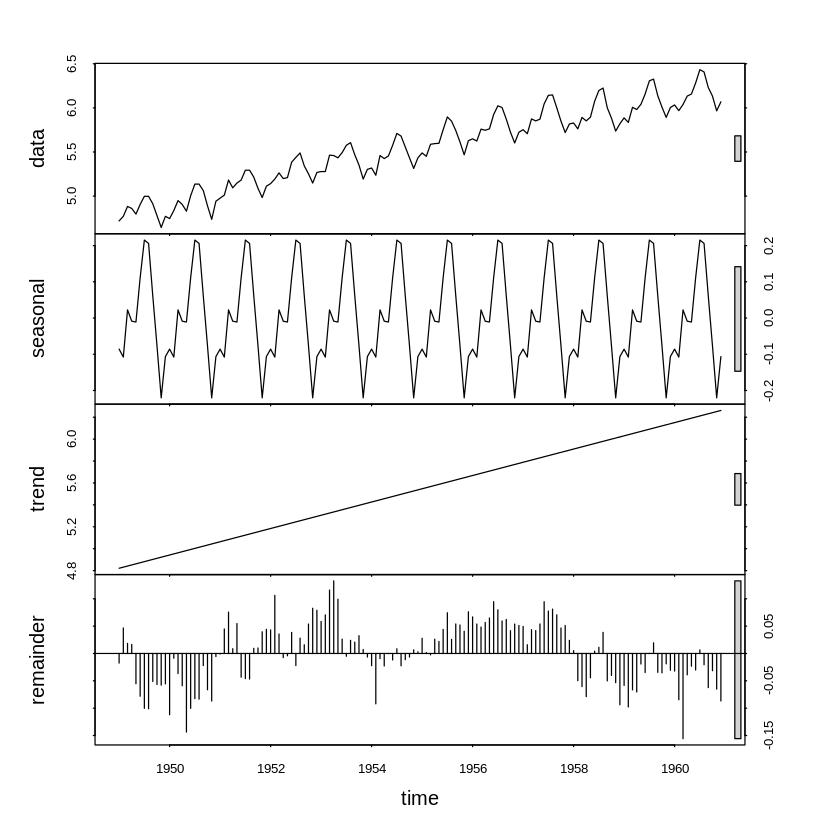

[1]  79  91  92 102 103 104 114 115 116 126 127 128 138 139 140

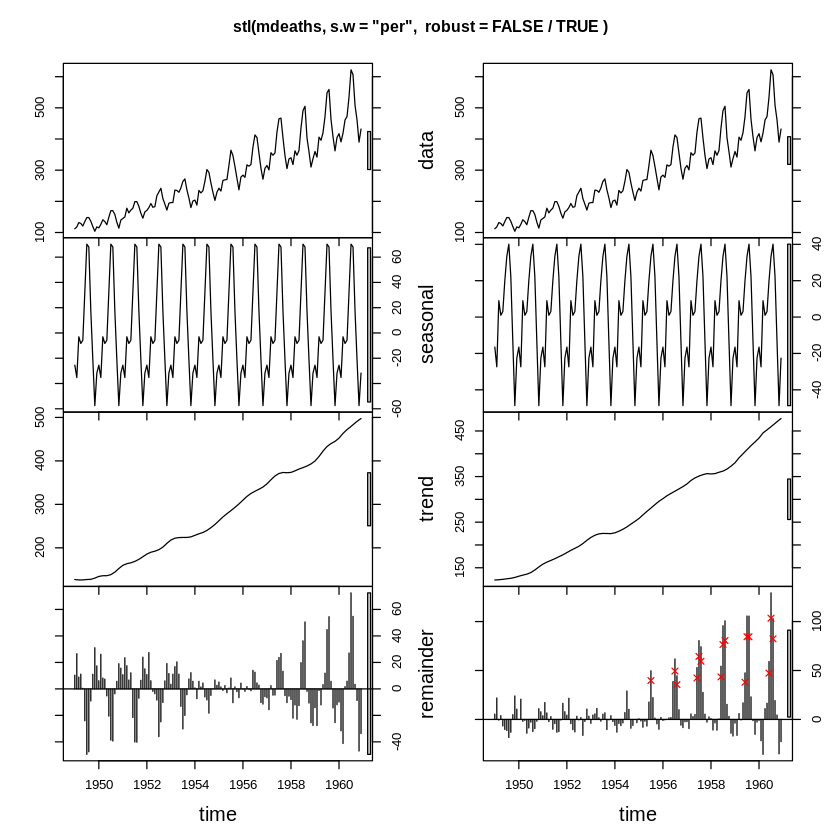

In [ ]:
##  7.2.2 時間序列分解 stl() -------------
?stl
# Seasonal Decomposition of Time Series by Loess (Local regression)
#                                          https://en.wikipedia.org/wiki/Local_regression
# 
require(graphics)
plot(stl(AirPassengers, "per"))
plot(stl(AirPassengers, s.window = 7, t.window = 50, t.jump = 1))

plot(stllair <- stl(log(AirPassengers), s.window = 21))
summary(stllair)
## linear trend, strict period.
plot(stl(log(AirPassengers), s.window = "per", t.window = 1000))

## Two STL plotted side by side :
stmd <- stl(AirPassengers, s.window = "per") # non-robust
summary(stmR <- stl(AirPassengers, s.window = "per", robust = TRUE))
op <- par(mar = c(0, 4, 0, 3), oma = c(5, 0, 4, 0), mfcol = c(4, 2))
plot(stmd, set.pars = NULL, labels  =  NULL,
     main = "stl(mdeaths, s.w = \"per\",  robust = FALSE / TRUE )")
plot(stmR, set.pars = NULL)
# mark the 'outliers' :
(iO <- which(stmR $ weights  < 1e-8)) # 10 were considered outliers
sts <- stmR$time.series
points(time(sts)[iO], 0.8* sts[,"remainder"][iO], pch = 4, col = "red")
par(op)   # reset

#  時間序列預測 ARIMA模型  
Time Series Forecasting ----

In [ ]:
### 7.3 時間序列預測 ARIMA模型  Time Series Forecasting ----
# 時間序列預測是根據歷史數據預測未來事件。 
# 一個例子是基於過去的表現來預測股票的開盤價格。 
# 兩個流行的時間序列預測模型是自回歸移動平均（ARMA）和自回歸移動平均（ARIMA）。
# Time series forecasting is to forecast future events based on historical data. One example is to predict the opening price of a stock based on its past performance. Two popular models for time series forecasting are autoregressive moving average (ARMA) and autoregressive integrated moving average (ARIMA).
?arima

In [ ]:
### 時間序列分析 -- 模型的建立 -----
# 在給定一時間序列資料, 我們通常使用下列步驟來決定一可能的模型。
# 要利用R來分析時間序列資料時, 需先下載名為“ ts”的資料庫。
# 先繪製時間序列圖, 並且選擇適當的轉換方式。對任何的時間序列分析, 首先採取的步驟皆是先畫出資料的圖形。
# 透過圖形的檢驗, 可提供關於資料的一些資訊, 像是趨勢、週期、離群值或者變異等。
# 對時間序列資料有時需要經過變異數平穩的轉換或者差分。常用的轉換如對資料取log或開平方。

#  案例了解 時間序列分析 

In [ ]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
?zoo   #Fit an ARIMA model to a univariate time series.

In [ ]:
library(zoo)
library(forecast)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:nlme’:

    getResponse




In [ ]:
# 載入AirPassengers資料
data(AirPassengers) 

In [ ]:
class(AirPassengers)
# [1] "ts"

[1] "ts"

In [ ]:
# 這個是Airpassengers數據開始的時間
start(AirPassengers) 
# [1] 1949 1

[1] 1949    1

In [ ]:
# 這個是Airpassengers數據結束的時間
end(AirPassengers)
# [1] 1960 12

[1] 1960   12

In [ ]:
# 時間序列的頻率是一年12個月(每月一筆資料)
frequency(AirPassengers)
# [1] 12

[1] 12

In [ ]:
summary(AirPassengers)
#  Min. 1st Qu. Median Mean  3rd Qu. Max.
# 104.0 180.0   265.5  280.3 360.5   622.0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

In [ ]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


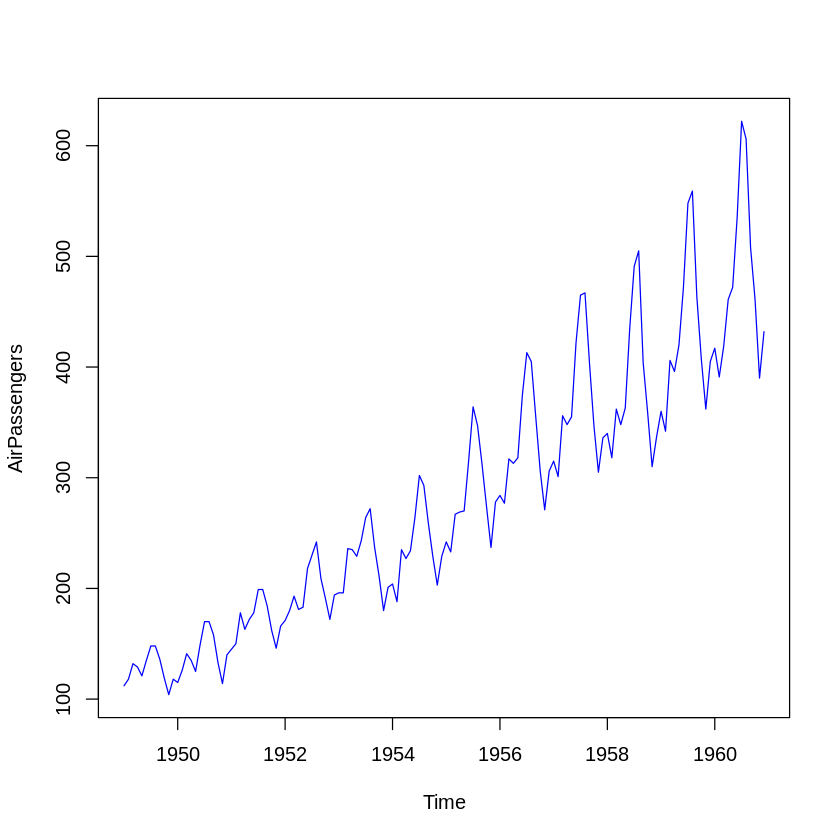

In [ ]:
# 繪製出時間序列
plot(AirPassengers,col = 'blue')

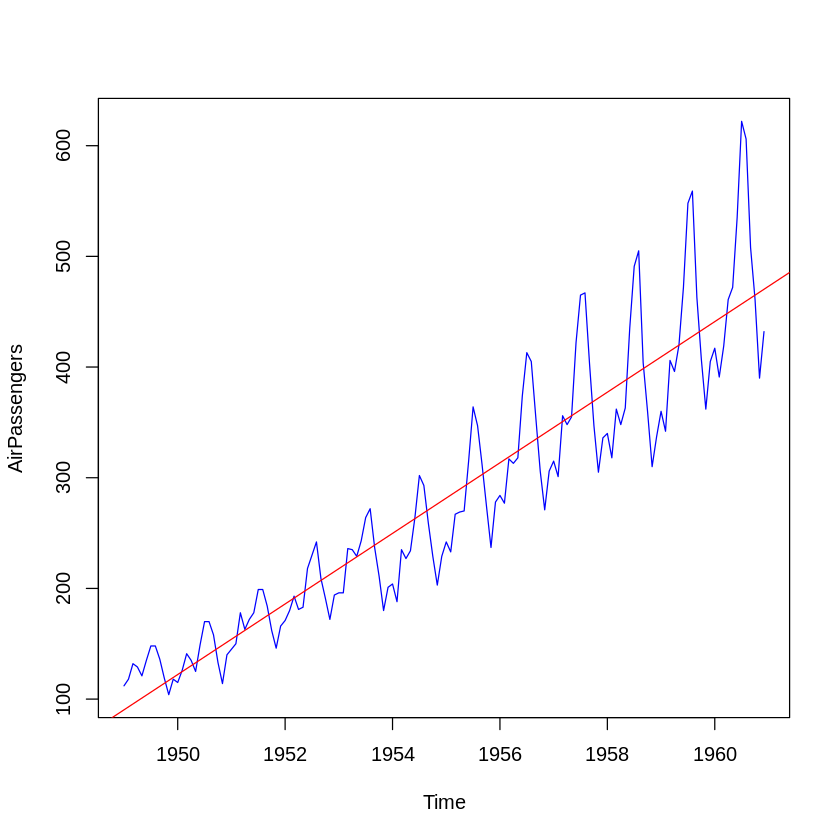

In [ ]:
# 擬合一條直線
plot(AirPassengers,col = 'blue')
abline(reg=lm(AirPassengers~time(AirPassengers)), col = "red")

In [ ]:
# 打印每年的週期
cycle(AirPassengers)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1,2,3,4,5,6,7,8,9,10,11,12
1950,1,2,3,4,5,6,7,8,9,10,11,12
1951,1,2,3,4,5,6,7,8,9,10,11,12
1952,1,2,3,4,5,6,7,8,9,10,11,12
1953,1,2,3,4,5,6,7,8,9,10,11,12
1954,1,2,3,4,5,6,7,8,9,10,11,12
1955,1,2,3,4,5,6,7,8,9,10,11,12
1956,1,2,3,4,5,6,7,8,9,10,11,12
1957,1,2,3,4,5,6,7,8,9,10,11,12
1958,1,2,3,4,5,6,7,8,9,10,11,12


In [ ]:
?aggregate

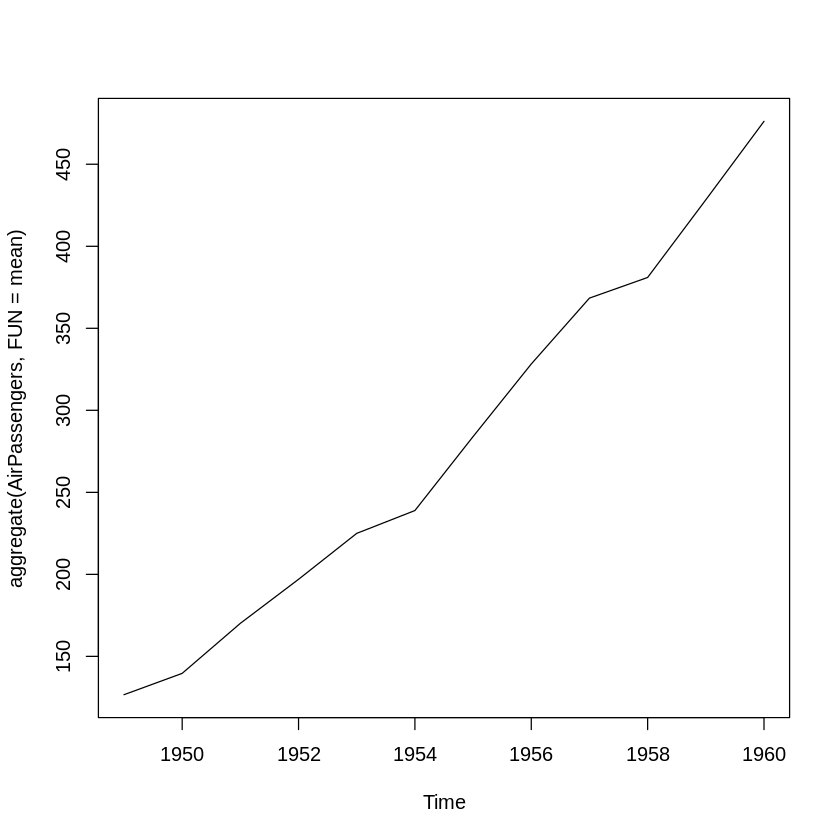

In [ ]:
# 繪製乘客累進圖
plot(aggregate(AirPassengers,FUN=mean))

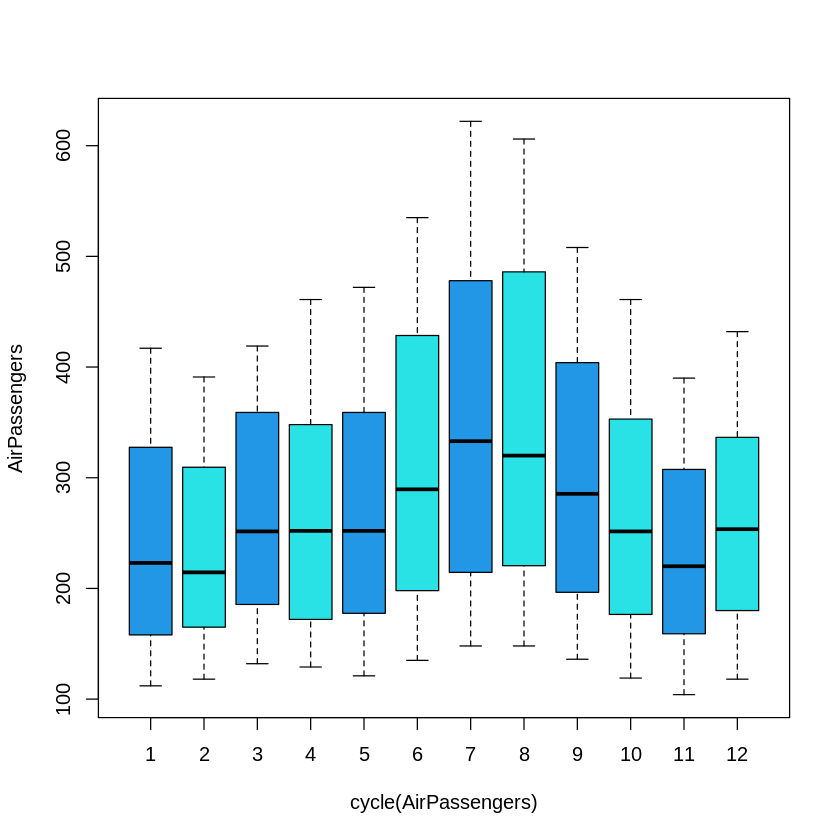

In [ ]:
# 繪製盒圖
boxplot(AirPassengers~cycle(AirPassengers), col = 4:5)

# 重要推論
- 每年的趨勢顯示旅客的數量每年都在增加
- 七八月的均值和方差比其他月份要高很多
- 每個月的平均值並不相同，但是方差差異很小。因此，可以看出具有很強的週期性，一個週期為12個月或更少。

In [ ]:
# 查看數據，試探數據是建立時間序列模型最重要的一部 - 如果沒有這一步，你將不知道這個序列是不是平穩序列就像這個例子一樣，我們已經知道了很多關於這個模型的很多細節。
# 接下來我們會建立一些時間序列模型以及這些模型的特徵，也會做一些預測。

# 我們從哪裡開始呢？
# 下圖是這些年的乘客數的圖。在往下看之前，觀察這個圖。
# 繪製出時間序列

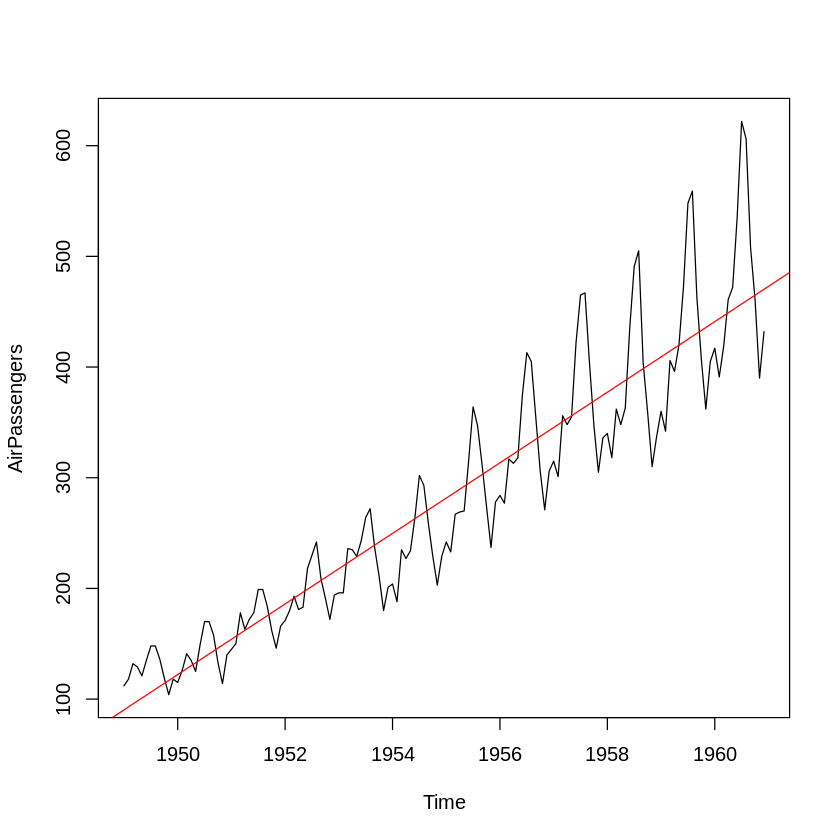

In [ ]:
plot(AirPassengers)
abline(reg=lm(AirPassengers~time(AirPassengers)), col = "red")

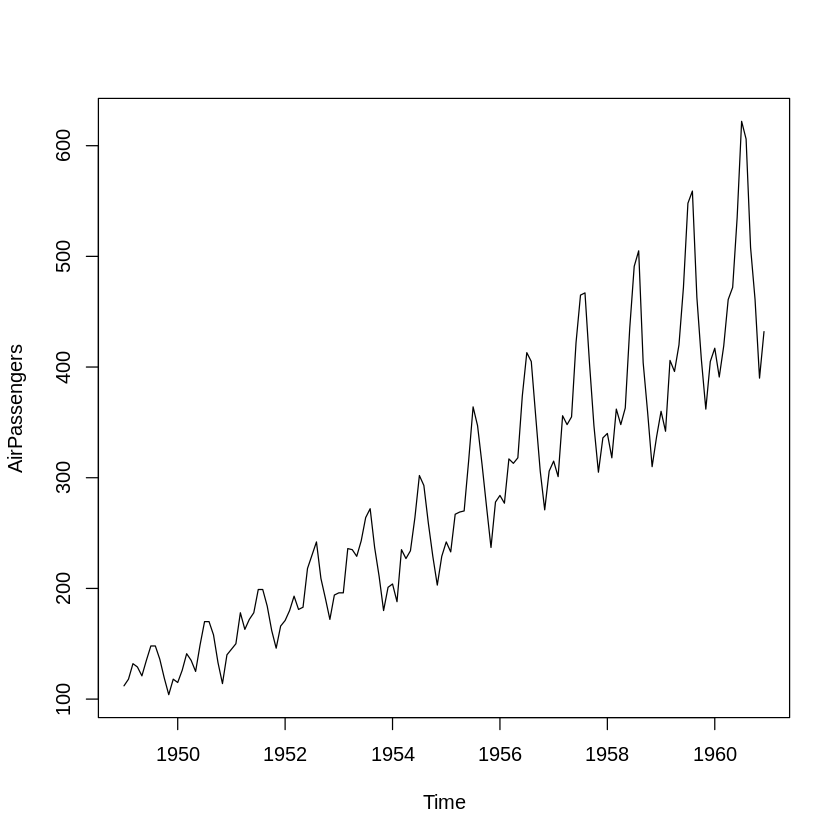

In [ ]:
# 觀察這個圖：
# 1.乘客有著逐年增加的趨勢。
# 2.這看起來有季節性，每一個週期不超過12個月。
# 3.數據的方差逐年增加。
# 查看趨勢圖- 航空公司的銷售數據
plot.ts(AirPassengers)

In [ ]:
?auto.arima

In [ ]:
# 利用auto.arima (取log)
auto.arima(log(AirPassengers),trace= T)
# ARIMA(2,1,2)(1,1,1)[12]                    : Inf
# ARIMA(0,1,0)(0,1,0)[12]                    : -434.799
# ARIMA(1,1,0)(1,1,0)[12]                    : -474.6299
# ARIMA(0,1,1)(0,1,1)[12]                    : -483.2101
# ARIMA(0,1,1)(1,1,1)[12]                    : -481.5957
# ARIMA(0,1,1)(0,1,0)[12]                    : -449.8857
# ARIMA(0,1,1)(0,1,2)[12]                    : -481.6451
# ARIMA(0,1,1)(1,1,2)[12]                    : Inf
# ARIMA(1,1,1)(0,1,1)[12]                    : -481.582
# ARIMA(0,1,0)(0,1,1)[12]                    : -467.4644
# ARIMA(0,1,2)(0,1,1)[12]                    : -481.2991
# ARIMA(1,1,2)(0,1,1)[12]                    : -481.5633
# 
# Best model: ARIMA(0,1,1)(0,1,1)[12]                    
# 
# Series: log(AirPassengers) 
# ARIMA(0,1,1)(0,1,1)[12] 
# 
# Coefficients:
#     ma1     sma1
# -0.4018  -0.5569
# s.e.   0.0896   0.0731
# 
# sigma^2 estimated as 0.001371:  log likelihood=244.7
# AIC=-483.4   AICc=-483.21   BIC=-474.77


 ARIMA(2,1,2)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(0,1,0)[12]                    : -434.799
 ARIMA(1,1,0)(1,1,0)[12]                    : -474.6299
 ARIMA(0,1,1)(0,1,1)[12]                    : -483.2101
 ARIMA(0,1,1)(0,1,0)[12]                    : -449.8857
 ARIMA(0,1,1)(1,1,1)[12]                    : -481.5957
 ARIMA(0,1,1)(0,1,2)[12]                    : -481.6451
 ARIMA(0,1,1)(1,1,0)[12]                    : -477.2164
 ARIMA(0,1,1)(1,1,2)[12]                    : Inf
 ARIMA(0,1,0)(0,1,1)[12]                    : -467.4644
 ARIMA(1,1,1)(0,1,1)[12]                    : -481.582
 ARIMA(0,1,2)(0,1,1)[12]                    : -481.2991
 ARIMA(1,1,0)(0,1,1)[12]                    : -481.3006
 ARIMA(1,1,2)(0,1,1)[12]                    : -481.5633

 Best model: ARIMA(0,1,1)(0,1,1)[12]                    



Series: log(AirPassengers) 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 = 0.001371:  log likelihood = 244.7
AIC=-483.4   AICc=-483.21   BIC=-474.77

In [ ]:
auto.arima(AirPassengers,trace= T) # ARIMA(2,1,1)(1,1,1)[12](沒取log)  最佳模型
# auto.arima提供的最佳模型為ARIMA(0,1,1)(2,1,2)[12]，我們可以同時測試兩個模型，看看哪個更適合。


 ARIMA(2,1,2)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(0,1,0)[12]                    : 1031.539
 ARIMA(1,1,0)(1,1,0)[12]                    : 1020.582
 ARIMA(0,1,1)(0,1,1)[12]                    : 1021.192
 ARIMA(1,1,0)(0,1,0)[12]                    : 1020.488
 ARIMA(1,1,0)(0,1,1)[12]                    : 1021.103
 ARIMA(1,1,0)(1,1,1)[12]                    : Inf
 ARIMA(2,1,0)(0,1,0)[12]                    : 1022.583
 ARIMA(1,1,1)(0,1,0)[12]                    : 1022.583
 ARIMA(0,1,1)(0,1,0)[12]                    : 1020.733
 ARIMA(2,1,1)(0,1,0)[12]                    : 1018.165
 ARIMA(2,1,1)(1,1,0)[12]                    : 1018.395
 ARIMA(2,1,1)(0,1,1)[12]                    : 1018.84
 ARIMA(2,1,1)(1,1,1)[12]                    : Inf
 ARIMA(3,1,1)(0,1,0)[12]                    : 1019.565
 ARIMA(2,1,2)(0,1,0)[12]                    : 1019.771
 ARIMA(1,1,2)(0,1,0)[12]                    : 1024.478
 ARIMA(3,1,0)(0,1,0)[12]                    : 1023.984
 ARIMA(3,1,2)(0,1,0)[12] 

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

In [ ]:
# auto.arima提供的最佳模型為ARIMA(0,1,1)(2,1,2)[12]，我們可以同時測試兩個模型，看看哪個更適合。
air_arima1 <- arima(log(AirPassengers),order=c( 0 , 1 , 1 ),
                   seasonal=list(order=c( 0 , 1 , 1 ),period= 12 ), 
                   method= "ML" )  # 'method' should be one of “CSS-ML”, “ML”, “CSS”
air_arima1


Call:
arima(x = log(AirPassengers), order = c(0, 1, 1), seasonal = list(order = c(0, 
    1, 1), period = 12), method = "ML")

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001348:  log likelihood = 244.7,  aic = -483.4

In [ ]:
air_arima2 <- arima(AirPassengers,order=c( 2 , 1 , 1 ),
                   seasonal=list(order=c( 0 , 1 , 0 ),period= 12 ), 
                   method= "ML" )  # 'method' should be one of “CSS-ML”, “ML”, “CSS”
air_arima2


Call:
arima(x = AirPassengers, order = c(2, 1, 1), seasonal = list(order = c(0, 1, 
    0), period = 12), method = "ML")

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 estimated as 129.3:  log likelihood = -504.92,  aic = 1017.85

AIC越小越好

In [ ]:
# 兩個ARIMA模型都採用極大似然方法估計，計算係數對應的t值：

# ARIMA(0,1,1)(0,1,1)[12] ：t(ma1)=-39.1791, t(sma1)=-93.8445
# 
# ARIMA(0,1,1)(2,1,2)[12] : t(ma1)=-35.8173,t(sar1)=88.68383,t(sar2)=-3.56141,t(sma1)=-12.6615, t(sma2)= 6.855526
# 
# 可見兩個模型的係數都是顯著的，而ARIMA(0,1,1)(0,1,1)[12]的AIC和BIC比ARIMA(0,1,1)(2,1,2) [12]的要小，因此選擇模型ARIMA(0,1,1)(0,1,1)[12]。

#  預測一年後航空公司的銷售額

## 模型1 air_arima1 預測

In [ ]:
# 預測一年後航空公司的銷售額
air_forecast12 <- forecast(air_arima1, h= 12 ,level=c( 99.5 ))

In [ ]:
air_forecast12

         Point Forecast  Lo 99.5  Hi 99.5
Jan 1961       6.110186 6.007124 6.213248
Feb 1961       6.053775 5.933682 6.173868
Mar 1961       6.171715 6.036723 6.306707
Apr 1961       6.199300 6.050897 6.347704
May 1961       6.232556 6.071857 6.393255
Jun 1961       6.368779 6.196660 6.540897
Jul 1961       6.507294 6.324468 6.690120
Aug 1961       6.502906 6.309966 6.695846
Sep 1961       6.324698 6.122148 6.527248
Oct 1961       6.209008 5.997284 6.420732
Nov 1961       6.063487 5.842971 6.284004
Dec 1961       6.168025 5.939053 6.396997

In [ ]:
data.frame(air_forecast12)

,Point.Forecast,Lo.99.5,Hi.99.5
,<dbl>,<dbl>,<dbl>
Jan 1961,6.110186,6.007124,6.213248
Feb 1961,6.053775,5.933682,6.173868
Mar 1961,6.171715,6.036723,6.306707
Apr 1961,6.199300,6.050897,6.347704
May 1961,6.232556,6.071857,6.393255
Jun 1961,6.368779,6.196660,6.540897
Jul 1961,6.507294,6.324468,6.690120
Aug 1961,6.502906,6.309966,6.695846
Sep 1961,6.324698,6.122148,6.527248


In [ ]:
# 預測五年後航空公司的銷售額
air_forecast60 <- forecast(air_arima1, h= 60 ,level=c( 99.5 ))

In [ ]:
air_forecast60

         Point Forecast  Lo 99.5  Hi 99.5
Jan 1961       6.110186 6.007124 6.213248
Feb 1961       6.053775 5.933682 6.173868
Mar 1961       6.171715 6.036723 6.306707
Apr 1961       6.199300 6.050897 6.347704
May 1961       6.232556 6.071857 6.393255
Jun 1961       6.368779 6.196660 6.540897
Jul 1961       6.507294 6.324468 6.690120
Aug 1961       6.502906 6.309966 6.695846
Sep 1961       6.324698 6.122148 6.527248
Oct 1961       6.209008 5.997284 6.420732
Nov 1961       6.063487 5.842971 6.284004
Dec 1961       6.168025 5.939053 6.396997
Jan 1962       6.206435 5.953564 6.459306
Feb 1962       6.150025 5.881961 6.418088
Mar 1962       6.267964 5.985524 6.550405
Apr 1962       6.295550 5.999430 6.591669
May 1962       6.328805 6.019611 6.638000
Jun 1962       6.465028 6.143290 6.786766
Jul 1962       6.603543 6.269732 6.937354
Aug 1962       6.599156 6.253693 6.944618
Sep 1962       6.420948 6.064214 6.777681
Oct 1962       6.305257 5.937598 6.672916
Nov 1962       6.159737 5.781468 6

In [ ]:
data.frame(air_forecast60)

,Point.Forecast,Lo.99.5,Hi.99.5
,<dbl>,<dbl>,<dbl>
Jan 1961,6.110186,6.007124,6.213248
Feb 1961,6.053775,5.933682,6.173868
Mar 1961,6.171715,6.036723,6.306707
Apr 1961,6.199300,6.050897,6.347704
May 1961,6.232556,6.071857,6.393255
Jun 1961,6.368779,6.196660,6.540897
Jul 1961,6.507294,6.324468,6.690120
Aug 1961,6.502906,6.309966,6.695846
Sep 1961,6.324698,6.122148,6.527248


一年預測圖

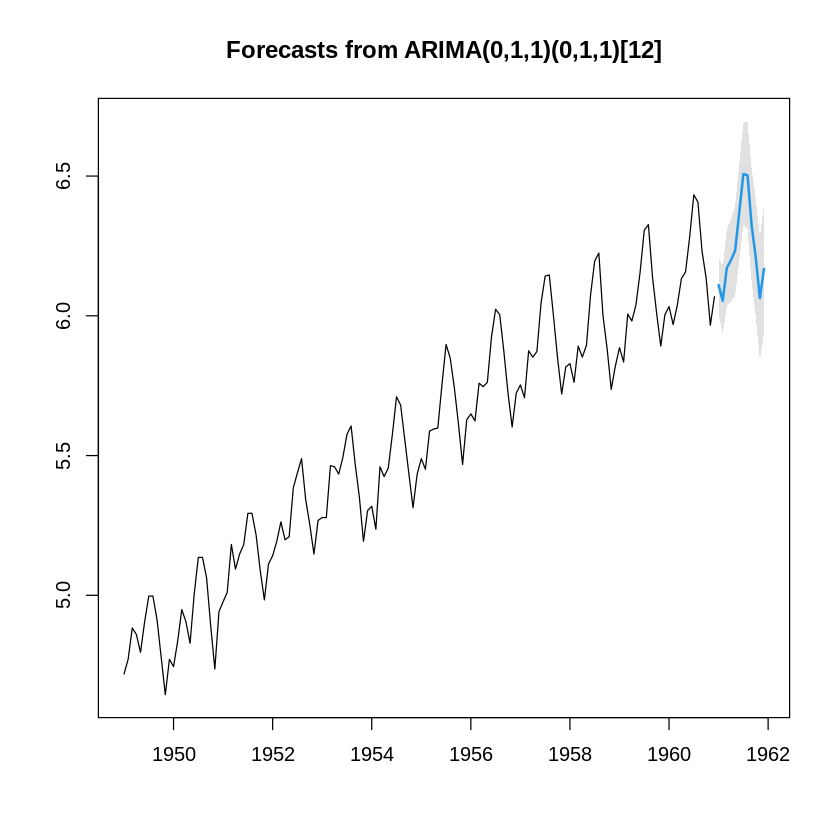

In [ ]:
plot(air_forecast12)
# 在上圖中，藍色實線表示預測值，灰色區間表示置信度為95％的誤差界限。

五年預測圖

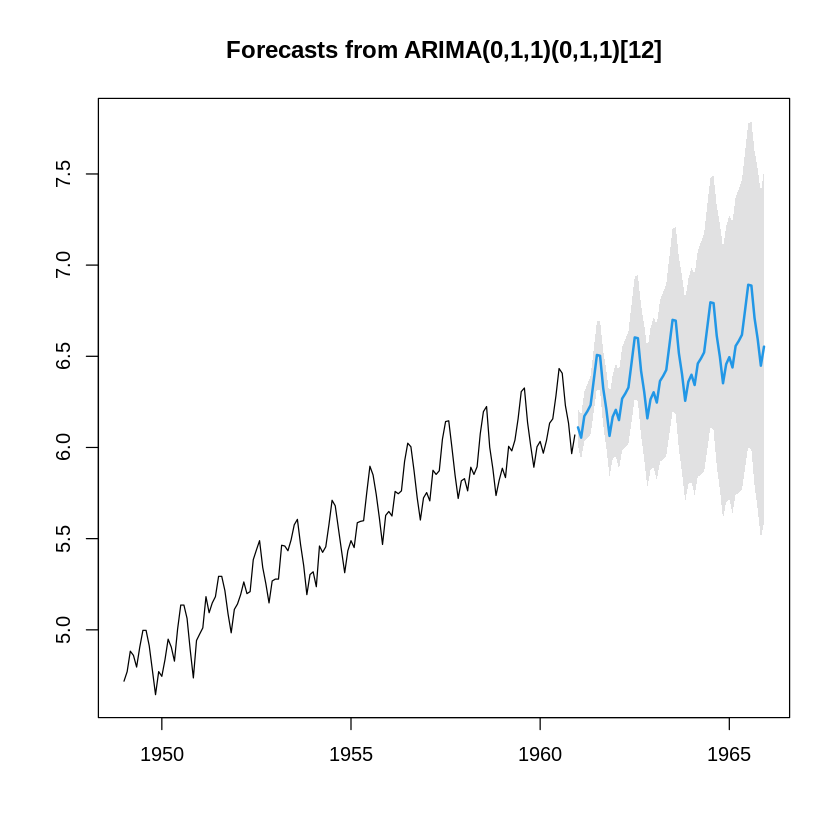

In [ ]:
plot(air_forecast60)

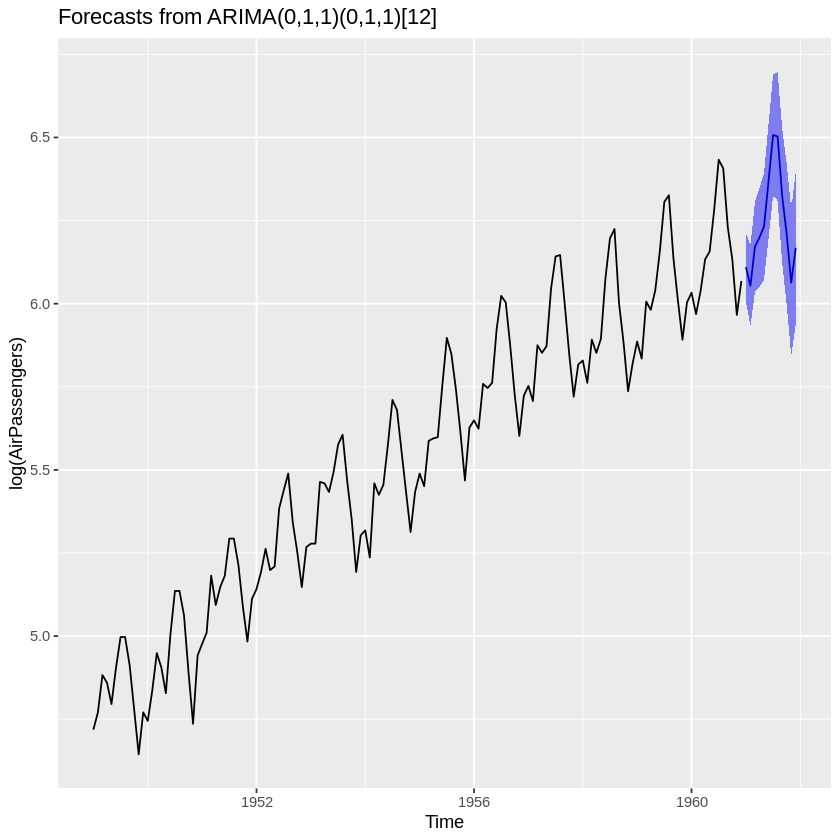

In [ ]:
autoplot(air_forecast12)

## 模型2 air_arima2 預測

In [ ]:
air_forecast12B <- forecast(air_arima2, h= 12 ,level=c( 99.5 ))

In [ ]:
air_forecast12B

         Point Forecast  Lo 99.5  Hi 99.5
Jan 1961       445.6347 413.7112 477.5581
Feb 1961       420.3947 382.9291 457.8603
Mar 1961       449.1979 407.1391 491.2567
Apr 1961       491.8394 446.7770 536.9019
May 1961       503.3939 456.1109 550.6769
Jun 1961       566.8618 517.9330 615.7907
Jul 1961       654.2595 604.0761 704.4429
Aug 1961       638.5968 587.4414 689.7522
Sep 1961       540.8830 488.9615 592.8046
Oct 1961       494.1259 441.5909 546.6608
Nov 1961       423.3320 370.2983 476.3657
Dec 1961       465.5068 412.0614 518.9522

In [ ]:
data.frame(air_forecast12B)

,Point.Forecast,Lo.99.5,Hi.99.5
,<dbl>,<dbl>,<dbl>
Jan 1961,445.6347,413.7112,477.5581
Feb 1961,420.3947,382.9291,457.8603
Mar 1961,449.1979,407.1391,491.2567
Apr 1961,491.8394,446.7770,536.9019
May 1961,503.3939,456.1109,550.6769
Jun 1961,566.8618,517.9330,615.7907
Jul 1961,654.2595,604.0761,704.4429
Aug 1961,638.5968,587.4414,689.7522
Sep 1961,540.8830,488.9615,592.8046


一年預測圖

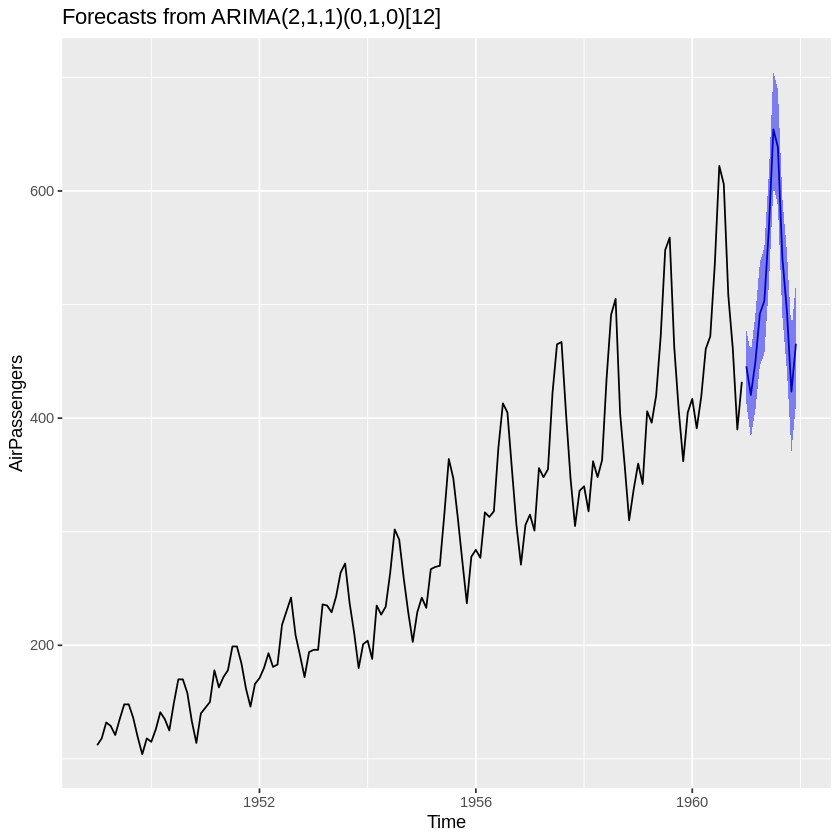

In [ ]:
autoplot(air_forecast12B)

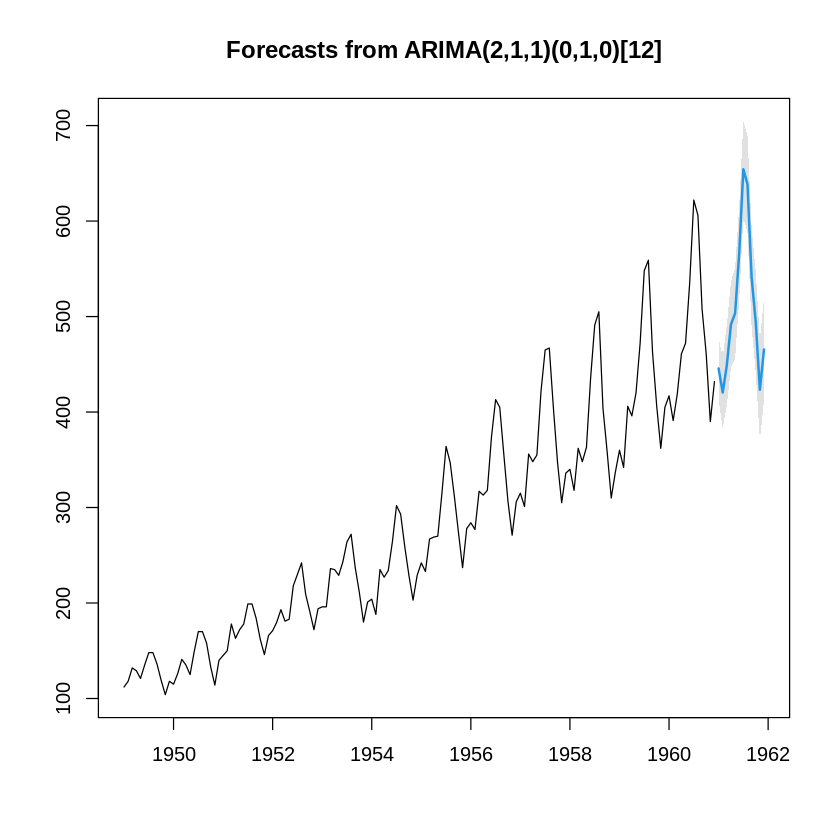

In [ ]:
plot(air_forecast12B)